# Rates & Angles

In [1]:
from config.settings import LocalDataPath, OutPath, PlotsPath
from config.plot_config import set_plot_style; set_plot_style()
import os
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import pickle
import seaborn as sns

In [2]:
with open(f"{OutPath}/run_TLV.pkl", "rb") as f:
    run_TLV = pickle.load(f)

with open(f"{OutPath}/run_SN.pkl", "rb") as f:
    run_SN = pickle.load(f)

with open(f"{OutPath}/run_WE.pkl", "rb") as f:
    run_WE = pickle.load(f)

In [3]:
data_TLV = run_TLV.get_data()
data_SN  = run_SN.get_data()
data_WE  = run_WE.get_data()

timestamps_TLV = np.array([tup[0] for tup in data_TLV])
timestamps_SN  = np.array([tup[0] for tup in data_SN])
timestamps_WE  = np.array([tup[0] for tup in data_WE])

angles_TLV = np.array([tup[1] for tup in data_TLV])
angles_SN  = np.array([tup[1] for tup in data_SN])
angles_WE  = np.array([tup[1] for tup in data_WE])

angles2_TLV = np.array([tup[1] for tup in data_TLV if tup[2] == 2])
angles2_SN  = np.array([tup[1] for tup in data_SN if tup[2] == 2])
angles2_WE  = np.array([tup[1] for tup in data_WE if tup[2] == 2])

angles3_TLV = np.array([tup[1] for tup in data_TLV if tup[2] == 3])
angles3_SN  = np.array([tup[1] for tup in data_SN if tup[2] == 3])
angles3_WE  = np.array([tup[1] for tup in data_WE if tup[2] == 3])

angles4_TLV = np.array([tup[1] for tup in data_TLV if tup[2] == 4])
angles4_SN  = np.array([tup[1] for tup in data_SN if tup[2] == 4])
angles4_WE  = np.array([tup[1] for tup in data_WE if tup[2] == 4])

## Rates

In [4]:
rate_TLV, drate_TLV = run_TLV.get_rate()
rate_SN, drate_SN   = run_SN.get_rate()
rate_WE, drate_WE   = run_WE.get_rate()

data = [
    ["TLV", rate_TLV, drate_TLV],
    ["KYUL-SN", rate_SN,drate_SN],
    ["KYUL-WE", rate_WE, drate_WE]
]

headers = ["Location", "Rate", "Stat Err"]

table = PrettyTable()
table.field_names = headers
for row in data:
    table.add_row(row)

print(table)

# ---

N = len(timestamps_SN) + len(timestamps_WE)
b = len(timestamps_SN) / N
c = len(timestamps_WE) / N

sup = rate_TLV / (b*rate_SN + c*rate_WE)
ERR = 76.61410894258873 # from http://www.julianibus.de/
# ---

print("Total Supression Factor = ", f"{sup} +- {ERR}")

+----------+----------+----------+
| Location |   Rate   | Stat Err |
+----------+----------+----------+
|   TLV    | 38.02813 | 0.36258  |
| KYUL-SN  | 0.00854  | 0.00021  |
| KYUL-WE  | 0.00853  | 0.00015  |
+----------+----------+----------+
Total Supression Factor =  4456.352697063411 +- 76.61410894258873


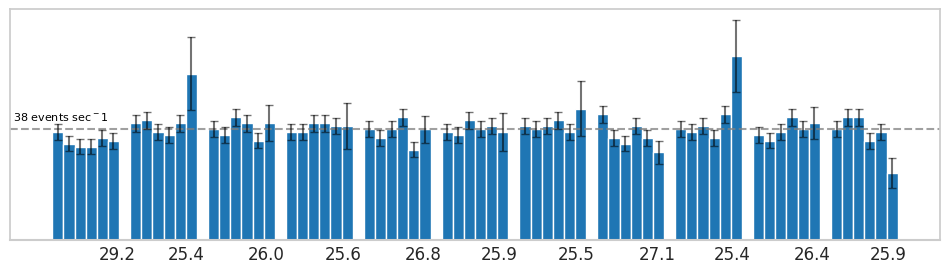

In [53]:
# Boundaries
TLV = 1000

SN1 = 631

WE1 = 725
WE2 = WE1 + 743
WE3 = WE2 + 690

step = 5
bins = np.arange(0, 390, step)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,3), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0, wspace=0)

finals_arr_idx = []
finals_arr_labels = []

offset = 35
for i in range(11):

    hist, bin_edges = np.histogram((i*offset) + timestamps_TLV[TLV*i:TLV*(i+1)], bins = bins)
    bin_mids        = bin_edges[:-1] + (np.diff(bin_edges)/2)

    non_zero = np.argwhere(hist).flatten()
    hist     = hist[non_zero]
    bin_mids = bin_mids[non_zero]

    errs = np.sqrt(hist)

    # Rescale to events per second (except last bin)
    hist[:-1] = hist[:-1] / step
    errs[:-1] = errs[:-1] / step

    # Now take care of last bin
    final_bin_remainder = timestamps_TLV[TLV*i:TLV*(i+1)][-1] % step
    hist[-1] = hist[-1] / final_bin_remainder
    errs[-1] = errs[-1] / final_bin_remainder

    ax.errorbar(bin_mids, hist, yerr = errs , fmt = 'o', markersize = 0,  color = 'black', capsize = 3, zorder = 3, alpha = 0.55)
    ax.bar(bin_mids, hist, width = step, color = "#1f76b4")

    finals_arr_labels.append(timestamps_TLV[TLV*i:TLV*(i+1)][-1])
    finals_arr_idx.append(i*offset + timestamps_TLV[TLV*i:TLV*(i+1)][-1])

ax.axhline(38, color = 'grey', linestyle = '--', alpha = 0.75)
ax.set_yticks([])
ax.set_xticks(finals_arr_idx, labels = np.round(finals_arr_labels,1))


ax.text(4, 41, rf"38 events sec$^{-1}$", fontsize=8, color="black", ha="center")
ax.set_xlabel()

ax.grid(False) 

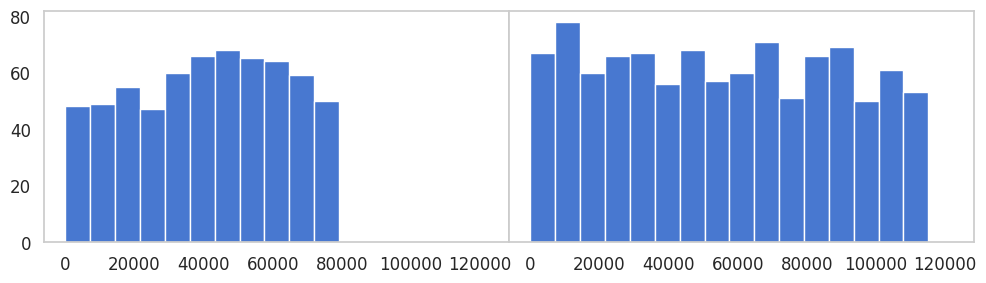

In [57]:
# Boundaries
TLV = 1000

SN1 = 631

WE1 = 725
WE2 = WE1 + 743
WE3 = WE2 + 690

hrs  = 2
bins = np.arange(0, 129600, hrs*3600)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,3), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0, wspace=0)

ax[0].hist(timestamps_SN[0:SN1], bins = bins)
ax[1].hist(timestamps_SN[SN1:], bins = bins)

ax[0].grid(False)
ax[1].grid(False) 

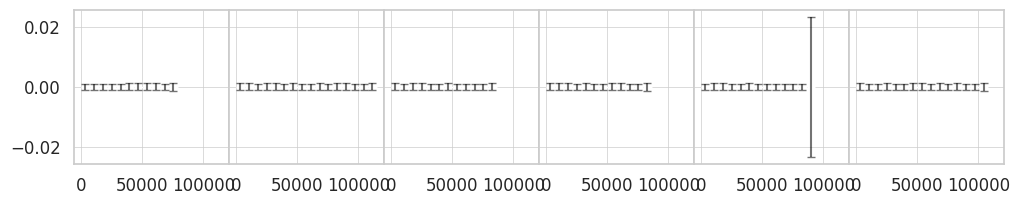

In [76]:
# Boundaries
TLV = 1000

SN1 = 631

WE1 = 725
WE2 = WE1 + 743
WE3 = WE2 + 690

arrays = [timestamps_SN[0:SN1], 
          timestamps_SN[SN1:], 
          timestamps_WE[0:WE1], 
          timestamps_WE[WE1:WE2], 
          timestamps_WE[WE2:WE3], 
          timestamps_WE[WE3:]]

hrs  = 2
step = hrs*3600
bins = np.arange(0, 129600, step)

fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(12,2), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0, wspace=0)

for i, arr in enumerate(arrays):

    hist, bin_edges = np.histogram(arr, bins = bins)
    bin_mids        = bin_edges[:-1] + (np.diff(bin_edges)/2)

    non_zero = np.argwhere(hist).flatten()
    hist     = hist[non_zero]
    bin_mids = bin_mids[non_zero]

    errs = np.sqrt(hist)

    # Rescale to events per second (except last bin)
    hist[:-1] = hist[:-1] / step
    errs[:-1] = errs[:-1] / step

    # Now take care of last bin
    final_bin_remainder = arr[-1] % step
    hist[-1] = hist[-1] / final_bin_remainder
    errs[-1] = errs[-1] / final_bin_remainder

    axs[i].errorbar(bin_mids, hist, yerr = errs , fmt = 'o', markersize = 0,  color = 'black', capsize = 3, zorder = 3, alpha = 0.55)
    axs[i].bar(bin_mids, hist, width = step, color = "#1f76b4")

"""
axs[0].hist(timestamps_SN[0:SN1], bins = bins)
axs[1].hist(timestamps_SN[SN1:], bins = bins)

axs[2].hist(timestamps_WE[0:WE1], bins = bins)
axs[3].hist(timestamps_WE[WE1:WE2], bins = bins)
axs[4].hist(timestamps_WE[WE2:WE3], bins = bins)
axs[5].hist(timestamps_WE[WE3:], bins = bins);
""";

In [9]:
len(timestamps_SN)

1631

In [10]:
len(timestamps_WE)

3076

In [11]:
3076 / (1631+3076)

0.6534947949861908

In [12]:
def get_rate(data):
    
    timestamps = np.array([tup[0] for tup in data])
    zero_idxs  = np.argwhere(timestamps==0)
    
    # Total number of triggers
    N          = len(timestamps)

    # Total number of runs
    M          = len(zero_idxs)

    # collect individual runs and total time T
    T    = 0
    runs = []
    for i in range(M-1):
        idx1 = zero_idxs[i][0]
        idx2 = zero_idxs[i+1][0]
        print(idx1, idx2)
        T   += timestamps[idx2-1] 
        runs.append(timestamps[idx1:idx2])

    runs.append(timestamps[idx2:])
    T   += timestamps[-1] 
    runs = np.array(runs)

    return runs, N, T